In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [14]:
img = cv2.imread("/Users/yongchenwan/Downloads/2.jpg")
n = 5
for i in range(n - 1):
    step_size = 768 / n
    img[int(step_size * (i + 1)), :, :] = [0, 255, 255]
    img[:, int(step_size * (i + 1)), :] = [0, 255, 255]
cv2.imwrite("/Users/yongchenwan/Downloads/22.jpg", img)

True

In [ ]:
img = cv2.imread('/Users/yongchenwan/0a4a116ea.jpg')
img_b = img[:, :, 0]
img_g = img[:, :, 1]
img_r = img[:, :, 2]

ret, thresh_b = cv2.threshold(img_b, 120, 255, cv2.THRESH_BINARY)
ret, thresh_g = cv2.threshold(img_g, 120, 255, cv2.THRESH_BINARY)
ret, thresh_r = cv2.threshold(img_r, 115, 255, cv2.THRESH_BINARY)

In [104]:
img = cv2.imread('/Users/yongchenwan/0a3b48a9c.jpg')
# img = cv2.imread('/Users/yongchenwan/Downloads/test/0a2c6480e.jpg')
# img = cv2.imread('/Users/yongchenwan/Downloads/predict/007b25c03_label.png')
# imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = img[:, :, 2]
# size = len(r)
# value = tf.cast(tf.reshape(r, [1, size, size, 1]), tf.float32)
# # value = tf.reshape(tf.constant([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]], dtype=tf.float32), [1, 3, 3, 1])
# transpose_conv = tf.layers.conv2d(inputs=value, filters=1, kernel_size=3, strides=[1, 1], padding='same')

# sess = tf.InteractiveSession()
# sess.run(tf.initialize_all_variables())
# imgray = sess.run(transpose_conv)
# sess.close()

In [176]:
img = cv2.imread('/Users/yongchenwan/0a3ab4644.jpg')
img_b = img[:, :, 0]
img_g = img[:, :, 1]
img_r = img[:, :, 2]
# imgray = imgray.reshape([size, size, 1])
# cv2.imwrite('./drawing.png',img)
ret, thresh_b = cv2.threshold(img_b,140,255,0)
ret, thresh_g = cv2.threshold(img_g,90,255,0)
ret, thresh_r = cv2.threshold(img_r,85,255,0)
thresh = thresh_r - thresh_g - thresh_b
# print(thresh.shape)
image, cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2. CHAIN_APPROX_SIMPLE)
print(len(cnts))
# max_c = 0
# max_2c = 0
# for i in range(len(cnts)):
#     if len(cnts[i]) > len(cnts[max_c]):
# #         print("switch", i)
#         max_2c = max_c
#         max_c = i
#         continue
#     elif len(cnts[i]) > len(cnts[max_2c]):
#         max_2c = i
# print(max_c, max_2c)
# img = cv2.drawContours(img, cnts[max_c],-1,(0,0,255),3)
# img = cv2.drawContours(img, cnts[max_2c],-1,(0,0,255),3)#标记处编号为0的轮廓
img = cv2.drawContours(img, cnts,-1,(0,0,255),3)
# cv2.imwrite('./drawing.png', img)
cv2.imwrite('./thresh.png', thresh)

4004


True

In [ ]:
# root_dir = '/Users/yongchenwan'
img_names = [name for name in os.listdir(root_dir) if name.find(".jpg") != -1]
for index, name in enumerate(img_names):
    img = cv2.imread(os.path.join(root_dir, name))
#     b = img.copy()
# # set green and red channels to 0
#     b[:, :, 1] = 0
#     b[:, :, 2] = 0
#     g = img.copy()
# # set blue and red channels to 0
#     g[:, :, 0] = 0
#     g[:, :, 2] = 0
#     r = img.copy()
# # set blue and green channels to 0
#     r[:, :, 0] = 0
#     r[:, :, 1] = 0
    b = img[:, :, 0]
    g = img[:, :, 1]
    r = img[:, :, 2]
# RGB - Blue
    cv2.imwrite('/Users/yongchenwan/Downloads/result/' + str(index) + 'B-RGB.png', b)
# RGB - Green
    cv2.imwrite('/Users/yongchenwan/Downloads/result/' + str(index) + 'G-RGB.png', g)
# RGB - Red
    cv2.imwrite('/Users/yongchenwan/Downloads/result/' + str(index) + 'R-RGB.png', r)

## nearest components

In [32]:
img = cv2.imread('/Users/yongchenwan/Downloads/predict/007b25c03_label.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
input = cv2.connectedComponentsWithStats(img, connectivity=4)
x = cv2.connectedComponents(img, connectivity=4)
# print(input[0])
# print(input[1])
print(input[2])
# print(input[3])

# Parameters:	
# image – the image to be labeled
# labels – destination labeled image
# connectivity – 8 or 4 for 8-way or 4-way connectivity respectively
# ltype – output image label type. Currently CV_32S and CV_16U are supported.
# statsv –
# statistics output for each label, including the background label, see below for available statistics. Statistics are accessed via statsv(label, COLUMN) where available columns are defined below.

# CC_STAT_LEFT The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
# CC_STAT_TOP The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
# CC_STAT_WIDTH The horizontal size of the bounding box
# CC_STAT_HEIGHT The vertical size of the bounding box
# CC_STAT_AREA The total area (in pixels) of the connected component
# centroids – floating point centroid (x,y) output for each label, including the background label


[[     0      0    768    768 579356]
 [   736      0     31      1     31]
 [   114    187     15      6     90]
 [   630    304     63     51   1314]
 [    96    435    157     79   4395]
 [   719    620     47    148   4638]]


In [9]:
# for i in reversed(range(1, 3)):
#     print("id is", i)

for i in range(3):
    print("id is", i)

id is 0
id is 1
id is 2


## Loading images

In [226]:
root_dir = '/Users/yongchenwan'
img_names = [name for name in os.listdir(root_dir) if name.find("_mask") != -1]

In [235]:
for index, name in enumerate(img_names):
    img = cv2.imread(os.path.join(root_dir, name))
#     resize_img = cv2.resize(img,(100,100),interpolation=cv2.INTER_NEAREST) 
#     cv2.imwrite(str(index) + '_mask.jpg', resize_img)    
    
    for i in range(512):
        for j in range(512):
            if (img[i, j, 0] != 0):
                print (img[i, j, :])
#     np.savetxt('text.txt', img[:, :, 0], fmt='%.2f')
#     np.savetxt('text_1.txt', img[:, :, 1], fmt='%.2f')
#     np.savetxt('text_2.txt', img[:, :, 2], fmt='%.2f')


[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255  

[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255  

[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255  

[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]


### Visualize the labeled colour

In [239]:
labels = [[0, 255, 255], [255, 255, 0], [255, 0, 255], [0, 255, 0], [0, 0, 255],
              [255, 255, 255], [0, 0, 0]]
for i in range(7):
    img = np.zeros((512, 512, 3))
    img[:, :, :] = labels[i]
#     "./test_img/%d.png" % number_name, test_imgs
    plt.imsave("./%d.png" % i, img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


## Test if decode works

In [275]:
def decode_label_to_RGB (num_rows, num_cols, img):
#     img_predict = tf.reshape(tf.argmax(logits, 3), [FLAGS.batch_size, 512, 512, 1])
    img_predict = tf.reshape(img, [1, num_rows, num_cols, 1])
    img_predict_channel_3 = tf.cast(tf.concat([img_predict, img_predict, img_predict], axis=3), tf.float64)
    labels = [[0, 255, 255], [255, 255, 0], [255, 0, 255], [0, 255, 0], [0, 0, 255],
              [255, 255, 255], [0, 0, 0]]
    img_predict_target = img_predict_channel_3
    num_classes = 7
    for i in range(num_classes):
        img_predict_bool = tf.equal(img_predict_channel_3, i)
        label_i = np.zeros((1, num_rows, num_cols, 3))
        label_i[:, :, :, :] = labels[i]
        img_predict_target = tf.where(img_predict_bool, label_i, img_predict_target)
    return img_predict_target

In [276]:
m = np.random.randint(low=0, high=6, size=[200, 200, 1])
num_rows, num_cols, dim = m.shape
rgb_img = decode_label_to_RGB(num_rows, num_cols, m)
# print(num_rows)
# print(num_cols)

200
200


In [277]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

out = sess.run(rgb_img)
out = out[0,:,:,:].reshape((num_rows, num_cols, 3))
plt.imsave("./%s.png" % 'test', out)

/usr/local/lib/python3.6/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


### Small testing attempts

In [213]:
# # m_new = np.resize(m, (6, 5, 3))
# # m_new[:, :, 1:] = [0, 0]
# # m_new
# m = np.resize(m, (6, 5))
label_0 = np.zeros((2, 6, 5, 3))
label_0[:, :, :, :] = [255, 0, 255]
# zero = np.zeros((6, 5, 3))
label_0[0, :, :, :].shape

(6, 5, 3)

In [207]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

x = tf.constant(3)
y = tf.constant(2)
out = sess.run(tf.divide(x, y))
print(out)

# col_max = sess.run(tf.argmax(m, 0) )  #当axis=0时返回每一列的最大值的位置索引
# print (col_max.shape)

# row_max = sess.run(tf.argmax(m, 2) )  #当axis=1时返回每一行中的最大值的位置索引
# print (row_max.shape)

# array([2, 3, 0, 3, 0, 0, 0, 0, 3, 4])
# array([5, 0, 0, 8, 9])

1.5


/usr/local/lib/python3.6/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [203]:
x1 = [1, 2, 3]
x2 = [1, 2, 4]
np.equal(x1, x2)

array([ True,  True, False])

## Usage of tf.nn.conv2d_transpose

In [2]:
value = tf.reshape(tf.constant([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]], dtype=tf.float32), [1, 3, 3, 1]) 
# the format of filter: [height, width, output_channels, input_channels]
filter = tf.reshape(tf.constant([[1., 0.], [0., 1.]]), [2, 2, 1, 1])
# the format of output_shape: [NHWC]
output_shape = [1, 6, 6, 1]
# the format of strides: [1, stride, stride, 1]
strides = [1, 2, 2, 1]
padding = 'SAME'
# define the transpose conv op
transpose_conv = tf.nn.conv2d_transpose(value=value, filter=filter, output_shape=output_shape, strides=strides, padding=padding)
sess = tf.Session()
x = sess.run(transpose_conv)
x.shape

(1, 6, 6, 1)

## Usage of tf.layers.conv2d

In [10]:
size = 153
value = tf.reshape(tf.random_uniform((size, size, 1)), [1, size, size, 1])
# value = tf.reshape(tf.constant([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]], dtype=tf.float32), [1, 3, 3, 1])
transpose_conv = tf.layers.conv2d(inputs=value, filters=3, kernel_size=3, strides=[2, 2], padding='valid')

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
x = sess.run(transpose_conv)
sess.close()

x.shape
# size = 153
# kernel_size = 3
# (1, 77, 77, 22) strides = [2, 2], padding = same
# (1, 151, 151, 3) strides = [1, 1], padding = valid

Instructions for updating:
Use `tf.global_variables_initializer` instead.


(1, 76, 76, 3)

## Usage of tf.layers.conv2d_transpose

In [331]:
size = 77
value = tf.reshape(tf.random_uniform((size, size, 1)), [1, size, size, 1])
# value = tf.reshape(tf.constant([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]], dtype=tf.float32), [1, 3, 3, 1])
transpose_conv = tf.layers.conv2d_transpose(inputs=value, filters=22, kernel_size=3, strides=[2, 2], padding='same')

sess = tf.Session()
sess.run(tf.initialize_all_variables())
x = sess.run(transpose_conv)
sess.close()

x.shape
# size = 77
# (1, 154, 154, 22)


(1, 154, 154, 22)

## Experiment on pics

In [3]:
m = cv2.imread("img.jpg")
m = cv2.cvtColor(m, cv2.COLOR_BGR2RGB)
# m = m[...,::-1]
plt.imsave("./%s.png" % 'test', m)

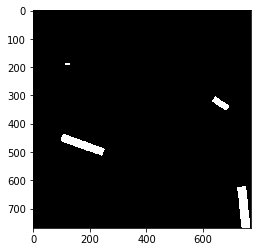

In [12]:
plt.imshow(cv2.imread("/Users/yongchenwan/Downloads/predict/007b25c03_label.png"))

In [21]:
m = cv2.imread("/Users/yongchenwan/Downloads/predict/007b25c03_label.png")[:,:,0]
n = cv2.imread("/Users/yongchenwan/Downloads/result/0a2e15e29_r.png")[:,:,0]
m[:, 400:] = 0
m = m + n
m[400:, 0:400] = 0
# img = np.zeros((768, 768, 3))
# img[:, :, 0] = m
# img[:, :, 1] = m
# img[:, :, 2] = m
# plt.imshow(img)
cv2.imwrite("/Users/yongchenwan/Downloads/merge/007b25c03_0.png", m)

True

In [33]:
n1 = cv2.imread("/Users/yongchenwan/Downloads/merge/007b25c03_6.png")[:,:,0]
n2 = cv2.imread("/Users/yongchenwan/Downloads/merge/007b25c03_0.png")[:,:,0]
n3 = cv2.imread("/Users/yongchenwan/Downloads/merge/007b25c03_2.png")[:,:,0]
img[:, :, 2] = n1
img[:, :, 1] = n2
img[:, :, 0] = n3
# plt.imshow(img)
cv2.imwrite("/Users/yongchenwan/Downloads/merge/test_5.png", img)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


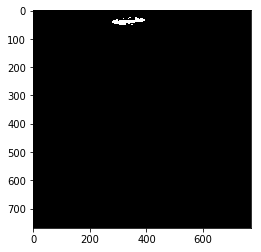

In [6]:
m = cv2.imread("/Users/yongchenwan/Downloads/result/0a1ef6741_r.png")[:,:,0]
# m[0:400, :] = 0
img = np.zeros((768, 768, 3))
img[:, :, 0] = m
img[:, :, 1] = m
img[:, :, 2] = m
plt.imshow(img)

## 5 channels together and conv

In [257]:
def preprocess(dir):
    m = cv2.imread("/Users/yongchenwan/Downloads" + dir)[:, :, 0]
    m = tf.cast(m.reshape((1, 768, 768, 1)), tf.float64)
    return m   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


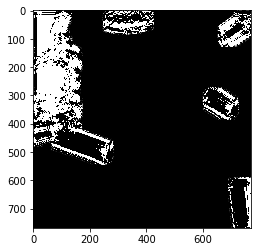

In [263]:
# m_0 = np.zeros((1, 768, 768, 1))
# m_0[:, 256:300, 340:530, :] = 255
# m_1 = np.zeros((1, 768, 768, 1))
# m_2 = np.zeros((1, 768, 768, 1))
# m_0[:, 304:380, 100:200, :] = 255
m_0 = preprocess("/predict/007b25c03_label.png")
m_1 = preprocess("/result/0a0aeea56_r.png")
m_2 = preprocess("/predict/010e15afe_label.png")
m_3 = preprocess("/predict/016ca71c9_label.png")
m_4 = preprocess("/result/0a1ef6741_r.png")
m = tf.concat([m_0, m_1, m_2, m_3, m_4], axis=3)

conv = tf.layers.conv2d(inputs=m, filters=5, kernel_size=23, strides=[1, 1], padding='same')
conv = tf.layers.conv2d(inputs=conv, filters=3, kernel_size=23, strides=[1, 1], padding='same')
conv = tf.layers.conv2d(inputs=conv, filters=1, kernel_size=23, strides=[1, 1], padding='same')
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
x = sess.run(conv)
# x = sess.run(tf.cast(x, tf.uint8))
sess.close()

x.reshape((768, 768))
img = np.zeros((768, 768, 3))
# m_0 = np.zeros((768, 768, 1))
# m_0[0:300, 340:700, :] = 255
img[:, :, :] = x
plt.imshow(img)

In [48]:
a = [False]
b = [True]
a == b

False

In [ ]:
def extract_channel(dir, i):
    m = cv2.imread("/Users/yongchenwan/" + dir)[:, :, i]
    m = tf.cast(m.reshape((1, 768, 768, 1)), tf.float64)
    return m   

In [ ]:
m_b = extract_channel("0a1a7f395.jpg", 0)
m_g = extract_channel("0a1a7f395.jpg", 1)
m_r = extract_channel("0a1a7f395.jpg", 2)
bool_r_b = tf.greater(m_r, m_b)
bool_r_g = tf.greater(m_r, m_g)
bool_all = 

## print model

In [4]:
import tensorflow as tf
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
savedir = "/Users/yongchenwan/"
# print_tensors_in_checkpoint_file(savedir + "linermodel.cpkt", None, True)
# W = tf.Variable(1.0, name="weight")
# b = tf.Variable(2.0, name="bias")
# # 放到一个字典里:
# saver = tf.train.Saver({'weight': b, 'bias': W})
# with tf.Session() as sess:
#     tf.global_variables_initializer().run()
#     saver.save(sess, savedir+"linermodel.cpkt")
print_tensors_in_checkpoint_file(savedir+"linermodel.cpkt", None, True)

tensor_name:  bias
1.0
tensor_name:  weight
2.0
